In [132]:
pip install tmdbsimple

In [3]:
import tmdbsimple as tmdb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [6]:
search = tmdb.Search()
tmdb.API_KEY = '9fe7d95c2c17afc126ac048afffec0c1'

In [7]:
# Wir rufen alle Filme ab, die zwischen 1995 und 2006 erschienen sind.
years = range(1995, 2006)

In [8]:
budgets = []
popularity = []
revenue = []
runtime = []
vote_average = []
vote_count = []
spoken_languages = []
release_year = []
production_companies = []
genres = []
original_title = []


for y in years:
    response = search.movie(query=y)
    nbre_page = response['total_pages']
    for page in range(nbre_page):
        nb_page = page+1
        response = search.movie(query=y, page=nb_page)
        for video in response['results']:  
            video_infos = tmdb.Movies(video['id']).info()
            if video_infos['original_title'] != "":
                original_title.append(video_infos['original_title'])
                budgets.append(video_infos['budget'])
                popularity.append(video_infos['popularity'])
                revenue.append(video_infos['revenue'])
                runtime.append(video_infos['runtime'])
                vote_average.append(video_infos['vote_average'])
                vote_count.append(video_infos['vote_count'])

                if len(video_infos['spoken_languages']) > 0:
                    spoken_languages.append(video_infos['spoken_languages'][0]['name'])
                else:
                    spoken_languages.append(np.NAN)

                if len(video_infos['release_date']) > 0:
                    release_year.append(video_infos['release_date'].split('-')[0])
                else:
                    release_year.append(np.NAN)

                if len(video_infos['production_companies']) > 0:
                    production_companies.append(video_infos['production_companies'][0]['name'])
                else:
                    production_companies.append(np.NAN)

                list_genres = ""
                for i, genre in enumerate(video_infos['genres']):
                    if i > 0:
                        list_genres += " "
                    list_genres += genre['name']
                genres.append(list_genres)
        
print(len(budgets))

2977


In [9]:
data = {'original_title': original_title, 'budgets': budgets, 'popularity': popularity, 'revenue': revenue, 'runtime': runtime,
       'vote_average': vote_average, 'vote_count': vote_count, 'spoken_languages': spoken_languages,
       'release_year': release_year, 'production_companies': production_companies, 'genres': genres}

In [11]:
dataframe = pd.DataFrame.from_dict(data)
print(dataframe.shape)
dataframe.head(10)

(2977, 11)


,original_title,budgets,popularity,revenue,runtime,vote_average,vote_count,spoken_languages,release_year,production_companies,genres
0,WWE Royal Rumble 1995,0,4.573,0,162.0,7.5,11,English,1995,World Wrestling Entertainment (WWE),Action Drama
1,WWE Survivor Series 1995,0,3.347,0,160.0,8.4,5,English,1995,World Wrestling Entertainment (WWE),Action Drama
2,Rammstein: Made in Germany 1995-2011,0,5.028,0,0.0,8.7,3,Deutsch,2011,NaN,
3,WWE SummerSlam 1995,0,1.800,0,163.0,6.3,4,English,1995,World Wrestling Entertainment (WWE),Action Drama
4,Kiss [1995] Alive 1995,0,1.126,0,0.0,0.0,0,NaN,1995,NaN,
5,WCW Slamboree 1995,0,1.786,0,164.0,0.0,0,English,1995,World Championship Wrestling (WCW),Action
6,Rammstein - Videos 1995-2012,0,1.944,0,120.0,8.1,6,Deutsch,2012,NaN,Music
7,WCW Starrcade 1995,0,1.599,0,164.0,0.0,0,English,1995,World Championship Wrestling (WCW),Action
8,WWE King of the Ring 1995,0,2.392,0,156.0,6.3,3,English,1995,World Wrestling Entertainment (WWE),Action Drama
9,WCW Uncensored 1995,0,1.490,0,145.0,2.0,1,English,1995,World Championship Wrestling (WCW),Action


In [17]:
dataframe.drop_duplicates(keep = 'first', inplace=True)

In [13]:
dataframe.to_csv('movies.csv', index=None)

In [18]:
dataframe = pd.read_csv('movies.csv')

In [16]:
dataframe

,original_title,budgets,popularity,revenue,runtime,vote_average,vote_count,spoken_languages,release_year,production_companies,genres
0,WWE Royal Rumble 1995,0,4.573,0,162.0,7.5,11,English,1995.0,World Wrestling Entertainment (WWE),Action Drama
1,WWE Survivor Series 1995,0,3.347,0,160.0,8.4,5,English,1995.0,World Wrestling Entertainment (WWE),Action Drama
2,Rammstein: Made in Germany 1995-2011,0,5.028,0,0.0,8.7,3,Deutsch,2011.0,NaN,NaN
3,WWE SummerSlam 1995,0,1.800,0,163.0,6.3,4,English,1995.0,World Wrestling Entertainment (WWE),Action Drama
4,Kiss [1995] Alive 1995,0,1.126,0,0.0,0.0,0,NaN,1995.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2890,Il Barbiere di Siviglia,0,0.825,0,167.0,7.0,1,Italiano,2005.0,Teatro Real de Madrid,Music
2891,Clone Wars: Bridging the Saga,0,0.990,0,8.0,2.0,1,English,2005.0,Lucasfilm,Documentary
2892,Family Guy Presents: Stewie Griffin: The Untol...,0,18.811,0,88.0,6.9,299,English,2005.0,20th Century Fox Television,Action Adventure Animation Comedy
2893,名探偵コナン 水平線上の陰謀,0,11.571,0,110.0,6.8,91,日本語,2005.0,TMS Entertainment,Animation Mystery


In [19]:
# # Count the number of missing values
dataframe.isna().sum()

original_title             0
budgets                    0
popularity                 0
revenue                    0
runtime                  178
vote_average               0
vote_count                 0
spoken_languages        1361
release_year             419
production_companies    1738
genres                  1149
dtype: int64

# Histogramme

# Genre Histogramme
(zeigt an, wie oft das jeweilige Genre in den Filmen vorkommt) 

In [20]:
# Häufigkeit des Auftretens der verschiedenen Gattungen
dataframe.genres.value_counts()

Music                                             522
Documentary                                       281
Action Drama                                      114
Action                                             85
Comedy                                             76
                                                 ... 
Documentary Drama Music                             1
Mystery Thriller                                    1
Comedy Romance Science Fiction                      1
Adventure Drama Family Fantasy Science Fiction      1
Science Fiction Adventure Action                    1
Name: genres, Length: 320, dtype: int64

In [ ]:
#  Wir haben 152 Genres mit mehreren Genres, die einmal vorkommen.
# Wir zeigen das Histogramm für die ersten 10 Genres an

In [21]:
genres = []
compteur = 0
for g in dataframe.genres.value_counts().iteritems():
    h = [g[0], g[1]]
    genres.append(h)
    compteur += 1
    if compteur == 10:
        break

In [22]:
genres

[['Music', 522],
 ['Documentary', 281],
 ['Action Drama', 114],
 ['Action', 85],
 ['Comedy', 76],
 ['Drama', 64],
 ['Horror', 27],
 ['Documentary Music', 26],
 ['Music Documentary', 22],
 ['Science Fiction', 14]]

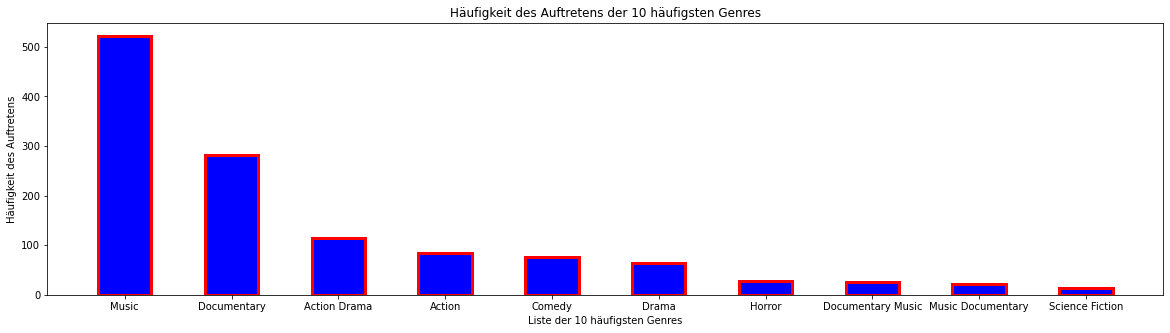

In [23]:
plt.figure(figsize=(20, 5))
plt.bar([x[0] for x in genres], [x[1] for x in genres], width=0.5, color='blue', edgecolor='red', linewidth=3)
plt.title("Häufigkeit des Auftretens der 10 häufigsten Genres")
plt.ylabel("Häufigkeit des Auftretens")
plt.xlabel("Liste der 10 häufigsten Genres")
plt.show()

In [ ]:
# Das Histogramm zeigt die zehn häufigsten Filmgenres, d.h. es gibt mehr Videos aus dem Genre Musik

# Histogramme of vote_average

In [ ]:
dataframe.vote_average.value_counts()

In [ ]:
# Man bemerkt, dass die Stimmen Dezimalwerte sind.
# Wir bemerken, dass die Stimmen im Intervall [0, 10] liegen.
# Für das Histogramm verwenden wir den ganzzahligen Wert

In [24]:
vote_average = np.zeros(11) # Wir erstellen ein Array mit 10 Werten, wobei jeder der Werte auf 0 initialisiert wird.

for e in dataframe.vote_average.value_counts().iteritems():
    v = math.floor(e[0])
    vote_average[v] += e[1]

In [25]:
vote_average

array([1726.,   29.,   18.,   40.,  101.,  177.,  248.,  228.,  165.,
         58.,  105.])

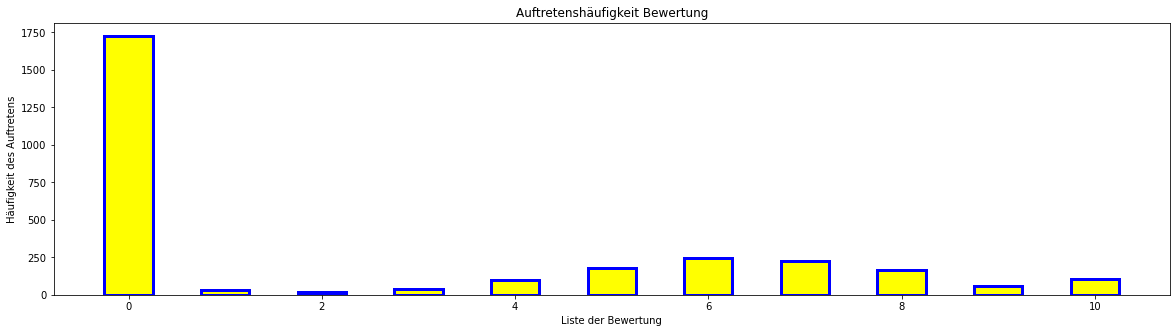

In [26]:
plt.figure(figsize=(20, 5))
plt.bar([x for x in range(11)], vote_average, width=0.5, color='Yellow', edgecolor='blue', linewidth=3)
plt.title("Auftretenshäufigkeit Bewertung")
plt.ylabel("Häufigkeit des Auftretens")
plt.xlabel("Liste der Bewertung")
plt.show()

In [ ]:
# anzahl der Filme nach der Note 

# Histogramme für Spieldauer

In [27]:
dataframe.runtime.value_counts()

0.0       890
180.0      67
90.0       61
120.0      49
100.0      37
         ... 
9000.0      1
205.0       1
219.0       1
217.0       1
206.0       1
Name: runtime, Length: 232, dtype: int64

In [28]:
dataframe.runtime.max()

9000.0

In [29]:
dataframe.runtime.min()

0.0

In [30]:
runtime = []
for g in dataframe.runtime.value_counts().iteritems():
    h = [g[0], g[1]]
    runtime.append(h)

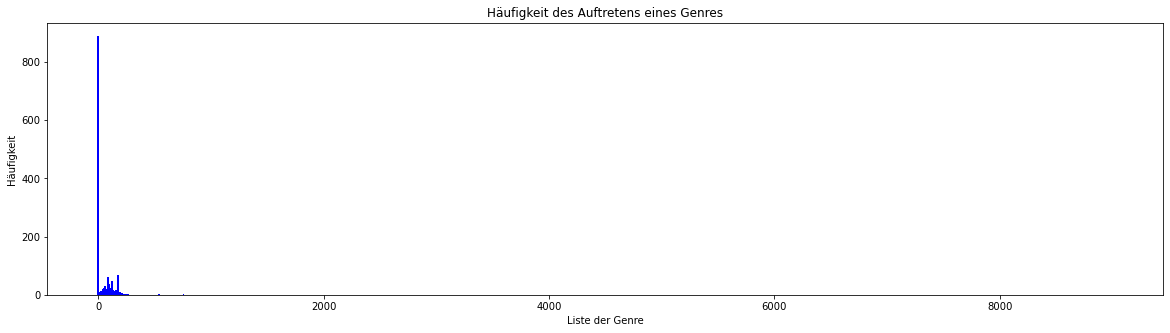

In [31]:
plt.figure(figsize=(20, 5))
plt.bar([x[0] for x in runtime], [x[1] for x in runtime], width=0.5, color='Black', edgecolor='Blue', linewidth=2)
plt.title("Häufigkeit des Auftretens eines Genres")
plt.ylabel("Häufigkeit")
plt.xlabel("Liste der Genre")
plt.show()

In [ ]:
# Wir werden die kollonale Dauer in Intervalle umwandeln.

In [32]:
dataframe['bins_runtime'] = pd.cut(dataframe['runtime'], bins=[x for x in range(0, 400, 50)], include_lowest=True)

In [33]:
dataframe

,original_title,budgets,popularity,revenue,runtime,vote_average,vote_count,spoken_languages,release_year,production_companies,genres,bins_runtime
0,WWE Royal Rumble 1995,0,4.573,0,162.0,7.5,11,English,1995.0,World Wrestling Entertainment (WWE),Action Drama,"(150.0, 200.0]"
1,WWE Survivor Series 1995,0,3.347,0,160.0,8.4,5,English,1995.0,World Wrestling Entertainment (WWE),Action Drama,"(150.0, 200.0]"
2,Rammstein: Made in Germany 1995-2011,0,5.028,0,0.0,8.7,3,Deutsch,2011.0,NaN,NaN,"(-0.001, 50.0]"
3,WWE SummerSlam 1995,0,1.800,0,163.0,6.3,4,English,1995.0,World Wrestling Entertainment (WWE),Action Drama,"(150.0, 200.0]"
4,Kiss [1995] Alive 1995,0,1.126,0,0.0,0.0,0,NaN,1995.0,NaN,NaN,"(-0.001, 50.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...
2890,Il Barbiere di Siviglia,0,0.825,0,167.0,7.0,1,Italiano,2005.0,Teatro Real de Madrid,Music,"(150.0, 200.0]"
2891,Clone Wars: Bridging the Saga,0,0.990,0,8.0,2.0,1,English,2005.0,Lucasfilm,Documentary,"(-0.001, 50.0]"
2892,Family Guy Presents: Stewie Griffin: The Untol...,0,18.811,0,88.0,6.9,299,English,2005.0,20th Century Fox Television,Action Adventure Animation Comedy,"(50.0, 100.0]"
2893,名探偵コナン 水平線上の陰謀,0,11.571,0,110.0,6.8,91,日本語,2005.0,TMS Entertainment,Animation Mystery,"(100.0, 150.0]"


In [34]:
dataframe.bins_runtime.value_counts()

(-0.001, 50.0]    1201
(50.0, 100.0]      718
(100.0, 150.0]     446
(150.0, 200.0]     296
(200.0, 250.0]      37
(250.0, 300.0]      11
(300.0, 350.0]       0
Name: bins_runtime, dtype: int64

In [35]:
runtime = []
for g in dataframe.bins_runtime.value_counts().iteritems():
    h = [str(g[0]), g[1]]
    runtime.append(h)

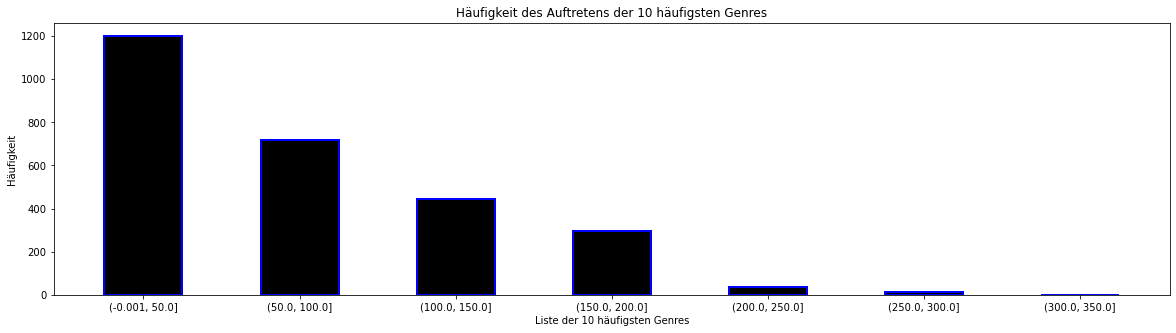

In [36]:
plt.figure(figsize=(20, 5))
plt.bar([x[0] for x in runtime], [x[1] for x in runtime], width=0.5, color='Black', edgecolor='Blue', linewidth=2)
plt.title("Häufigkeit des Auftretens der 10 häufigsten Genres")
plt.ylabel("Häufigkeit")
plt.xlabel("Liste der 10 häufigsten Genres")
plt.show()

# Scatter

# Einnahme / Budgets

In [37]:
revenue = dataframe.revenue.values
revenue

array([        0,         0,         0, ...,         0,         0,
       850000000], dtype=int64)

In [38]:
budgets = dataframe.budgets.values
budgets

array([        0,         0,         0, ...,         0,         0,
       113000000], dtype=int64)

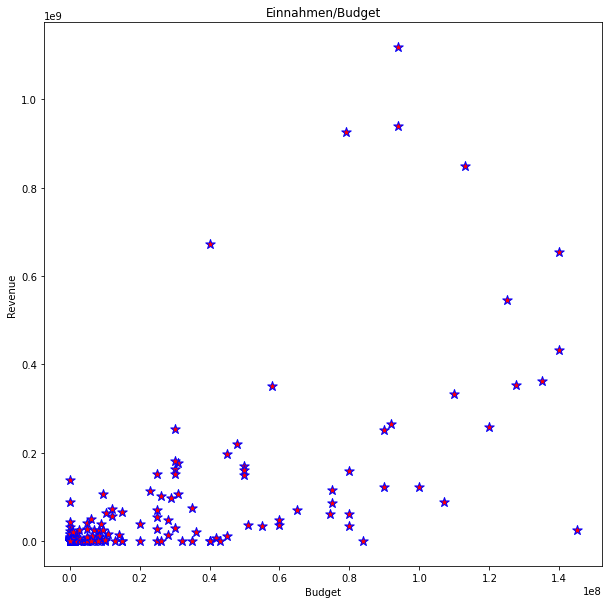

In [39]:
plt.figure(figsize=(10, 10))
plt.scatter(budgets, revenue, color='red', marker='*', edgecolors="blue", s=100)
plt.title("Einnahmen/Budget")
plt.ylabel("Revenue")
plt.xlabel("Budget")
plt.show()

In [ ]:
#  Die Achsenachse ist das Einnahme und die Ordnungsachse ist das Budget.
# Es gibt keinen großen Zusammenhang zwischen Budgets und Einnahmen und es stimmt generell, dass Filme mit großen Budgets große Einnahmen generieren.

# Bewertung / Budget

In [40]:
dataframe.vote_average.value_counts()

0.0     1725
10.0     105
8.0       94
6.0       79
7.0       70
        ... 
9.4        1
1.3        1
9.3        1
0.5        1
2.8        1
Name: vote_average, Length: 79, dtype: int64

In [41]:
# Wir wandeln die Bewertungskollone in Intervalle um
dataframe['bins_vote'] = pd.cut(dataframe['vote_average'], bins=[x for x in range(0, 10)], include_lowest=True)

In [42]:
dataframe

,original_title,budgets,popularity,revenue,runtime,vote_average,vote_count,spoken_languages,release_year,production_companies,genres,bins_runtime,bins_vote
0,WWE Royal Rumble 1995,0,4.573,0,162.0,7.5,11,English,1995.0,World Wrestling Entertainment (WWE),Action Drama,"(150.0, 200.0]","(7.0, 8.0]"
1,WWE Survivor Series 1995,0,3.347,0,160.0,8.4,5,English,1995.0,World Wrestling Entertainment (WWE),Action Drama,"(150.0, 200.0]","(8.0, 9.0]"
2,Rammstein: Made in Germany 1995-2011,0,5.028,0,0.0,8.7,3,Deutsch,2011.0,NaN,NaN,"(-0.001, 50.0]","(8.0, 9.0]"
3,WWE SummerSlam 1995,0,1.800,0,163.0,6.3,4,English,1995.0,World Wrestling Entertainment (WWE),Action Drama,"(150.0, 200.0]","(6.0, 7.0]"
4,Kiss [1995] Alive 1995,0,1.126,0,0.0,0.0,0,NaN,1995.0,NaN,NaN,"(-0.001, 50.0]","(-0.001, 1.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2890,Il Barbiere di Siviglia,0,0.825,0,167.0,7.0,1,Italiano,2005.0,Teatro Real de Madrid,Music,"(150.0, 200.0]","(6.0, 7.0]"
2891,Clone Wars: Bridging the Saga,0,0.990,0,8.0,2.0,1,English,2005.0,Lucasfilm,Documentary,"(-0.001, 50.0]","(1.0, 2.0]"
2892,Family Guy Presents: Stewie Griffin: The Untol...,0,18.811,0,88.0,6.9,299,English,2005.0,20th Century Fox Television,Action Adventure Animation Comedy,"(50.0, 100.0]","(6.0, 7.0]"
2893,名探偵コナン 水平線上の陰謀,0,11.571,0,110.0,6.8,91,日本語,2005.0,TMS Entertainment,Animation Mystery,"(100.0, 150.0]","(6.0, 7.0]"


In [43]:
vote = dataframe.bins_vote.values
vote

[(7.0, 8.0], (8.0, 9.0], (8.0, 9.0], (6.0, 7.0], (-0.001, 1.0], ..., (6.0, 7.0], (1.0, 2.0], (6.0, 7.0], (6.0, 7.0], (7.0, 8.0]]
Length: 2895
Categories (9, interval[float64, right]): [(-0.001, 1.0] < (1.0, 2.0] < (2.0, 3.0] < (3.0, 4.0] ... (5.0, 6.0] < (6.0, 7.0] < (7.0, 8.0] < (8.0, 9.0]]

In [44]:
vote_str = []
for i, v in enumerate(vote):
    vote_str.append(str(v))

In [45]:
budgets = dataframe.budgets.values
budgets

array([        0,         0,         0, ...,         0,         0,
       113000000], dtype=int64)

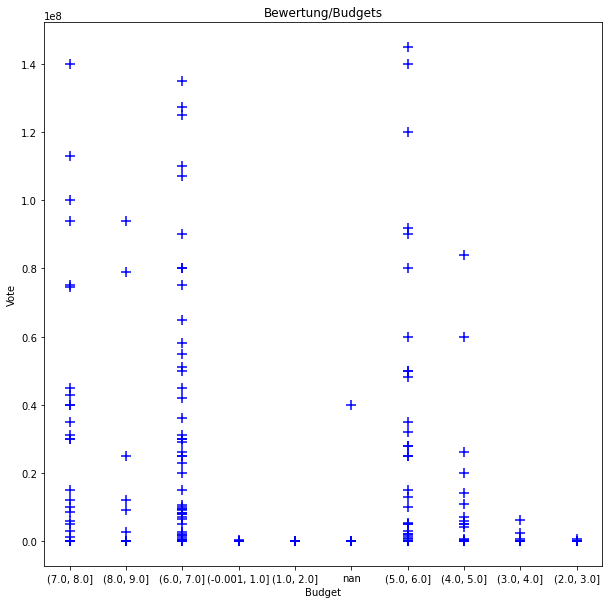

In [46]:
plt.figure(figsize=(10, 10))
plt.scatter(vote_str, budgets, color='blue', marker='+', s=100)
plt.title("Bewertung/Budgets")
plt.ylabel("Vote")
plt.xlabel("Budget")
plt.show()

# Bar charts

# Top-20-Liste der einnahmenstärksten Filme/Serien

In [47]:
# Wir sortieren den Dataframe nach dem Einnahmen
dataframe.sort_values(by='revenue', ascending=False)

,original_title,budgets,popularity,revenue,runtime,vote_average,vote_count,spoken_languages,release_year,production_companies,genres,bins_runtime,bins_vote
2143,The Lord of the Rings: The Return of the King,94000000,113.056,1118888979,201.0,8.5,19462,English,2003.0,New Line Cinema,Adventure Fantasy Action,"(200.0, 250.0]","(8.0, 9.0]"
2150,Finding Nemo,94000000,136.548,940335536,100.0,7.8,16317,English,2003.0,Pixar,Animation Family,"(50.0, 100.0]","(7.0, 8.0]"
1877,The Lord of the Rings: The Two Towers,79000000,121.966,926287400,179.0,8.4,18070,English,2002.0,New Line Cinema,Adventure Fantasy Action,"(150.0, 200.0]","(8.0, 9.0]"
2894,Star Wars: Episode III - Revenge of the Sith,113000000,37.732,850000000,140.0,7.4,11364,English,2005.0,Lucasfilm,Science Fiction Adventure Action,"(100.0, 150.0]","(7.0, 8.0]"
919,The Sixth Sense,40000000,36.744,672806292,107.0,7.9,9495,Latin,1999.0,Spyglass Entertainment,Mystery Thriller Drama,"(100.0, 150.0]","(7.0, 8.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,ECW Living Dangerously 2000,0,2.309,0,126.0,0.0,0,English,2000.0,NaN,NaN,"(100.0, 150.0]","(-0.001, 1.0]"
989,자화상 2000,0,0.600,0,0.0,0.0,0,NaN,2000.0,NaN,Drama,"(-0.001, 50.0]","(-0.001, 1.0]"
990,WCW Fall Brawl 2000,0,2.057,0,162.0,0.0,0,English,2000.0,World Championship Wrestling (WCW),Action,"(150.0, 200.0]","(-0.001, 1.0]"
991,WCW Spring Stampede 2000,0,2.072,0,158.0,9.5,2,English,2000.0,World Championship Wrestling (WCW),Action,"(150.0, 200.0]",NaN


In [48]:
title = []
revenue = []
itera = 0
for line in dataframe.sort_values(by='revenue', ascending=False).iterrows():
    title.append(line[1]['original_title'])
    revenue.append(line[1]['revenue'])
    itera += 1
    if itera == 10:
        break

In [49]:
import warnings
warnings.filterwarnings("ignore", message="")

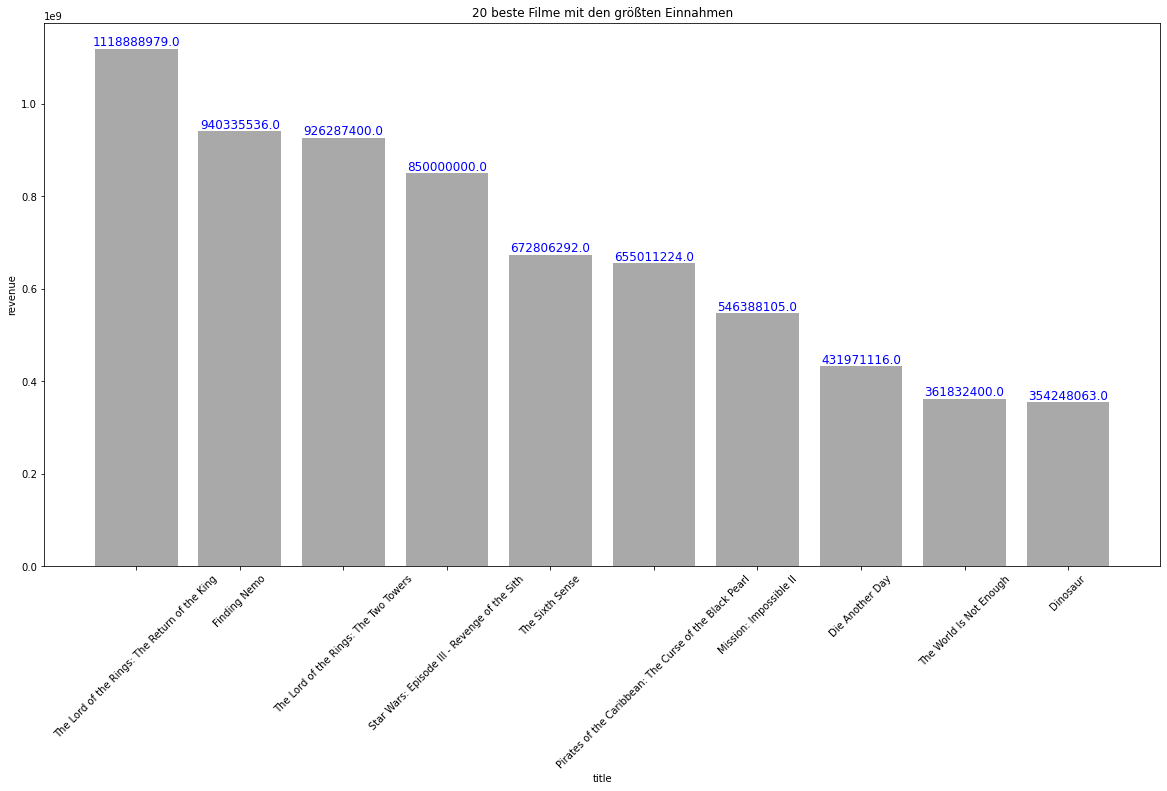

In [50]:
plt.figure(figsize=(20, 10))
plt.bar(x=title, height=revenue, color='darkgray')
plt.xticks(rotation=45)
plt.title("20 beste Filme mit den größten Einnahmen")
plt.ylabel("revenue")
plt.xlabel("title")
for i, val in enumerate(revenue):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12, 'color':'blue'})

plt.show()


In [ ]:
# stellt das Budget der teuersten Filme dar

# Top 20 der teuersten Filme/Serien

In [51]:
# Wir sortieren den Dataframe nach den Budgets.
dataframe.sort_values(by='budgets', ascending=False)

,original_title,budgets,popularity,revenue,runtime,vote_average,vote_count,spoken_languages,release_year,production_companies,genres,bins_runtime,bins_vote
2524,The Alamo,145000000,12.449,25819961,137.0,5.9,257,English,2004.0,Imagine Entertainment,Western History War Drama,"(100.0, 150.0]","(5.0, 6.0]"
2187,Pirates of the Caribbean: The Curse of the Bla...,140000000,714.800,655011224,143.0,7.8,17331,English,2003.0,Walt Disney Pictures,Adventure Fantasy Action,"(100.0, 150.0]","(7.0, 8.0]"
1893,Die Another Day,140000000,28.544,431971116,133.0,5.9,2828,English,2002.0,Eon Productions,Adventure Action Thriller,"(100.0, 150.0]","(5.0, 6.0]"
916,The World Is Not Enough,135000000,25.881,361832400,128.0,6.3,2300,English,1999.0,Eon Productions,Adventure Action Thriller,"(100.0, 150.0]","(6.0, 7.0]"
1309,Dinosaur,127500000,98.414,354248063,82.0,6.5,2012,English,2000.0,Walt Disney Pictures,Family Animation,"(50.0, 100.0]","(6.0, 7.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
984,WWE King of the Ring 2000,0,3.164,0,160.0,8.0,2,English,2000.0,World Wrestling Entertainment (WWE),Action Drama,"(150.0, 200.0]","(7.0, 8.0]"
985,WCW Uncensored 2000,0,2.015,0,154.0,0.0,0,English,2000.0,World Championship Wrestling (WCW),Action,"(150.0, 200.0]","(-0.001, 1.0]"
987,ピカチュウのふゆやすみ２０００,0,3.547,0,22.0,5.9,6,日本語,1999.0,Shogakukan Production,Animation Adventure Comedy Family,"(-0.001, 50.0]","(5.0, 6.0]"
988,ECW Living Dangerously 2000,0,2.309,0,126.0,0.0,0,English,2000.0,NaN,NaN,"(100.0, 150.0]","(-0.001, 1.0]"


In [88]:
title = []
budgets = []
itera = 0
for line in dataframe.sort_values(by='budgets', ascending=False).iterrows():
    title.append(line[1]['original_title'])
    budgets.append(line[1]['budgets'])
    itera += 1
    if itera == 20:
        break

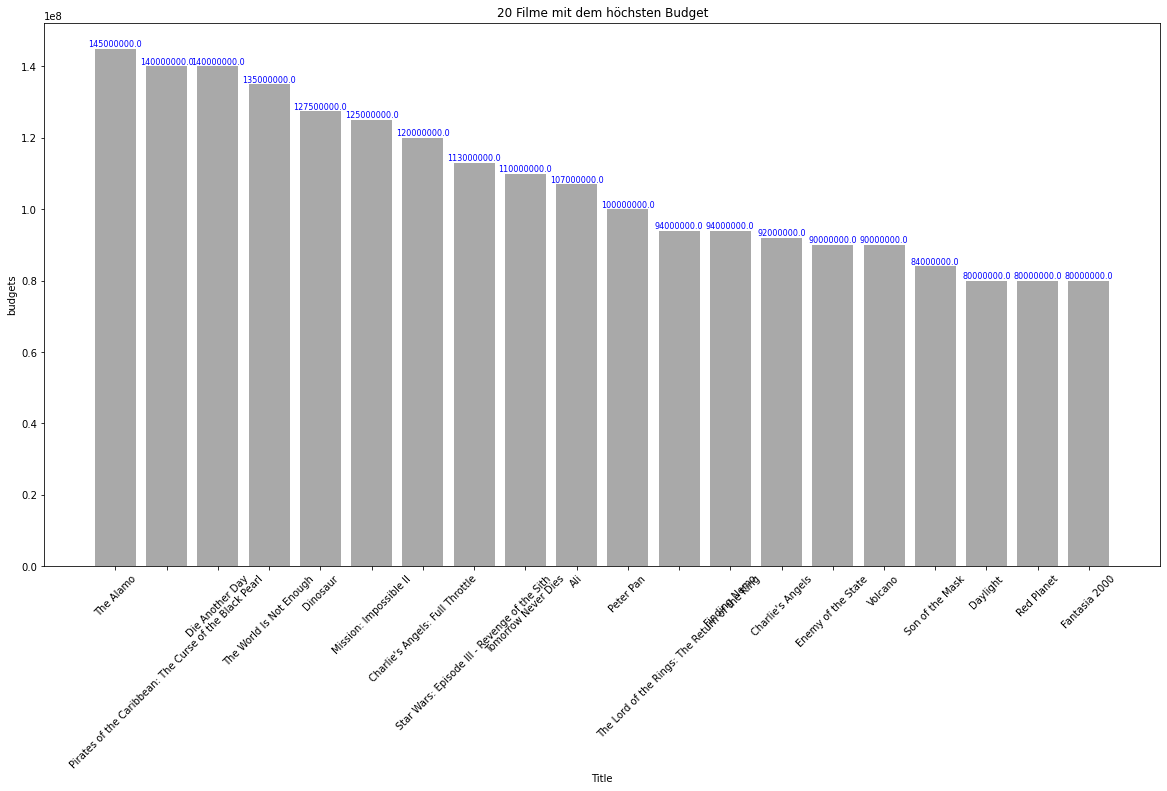

In [89]:
plt.figure(figsize=(20, 10))
plt.bar(x=title, height=budgets, color='darkgray')
plt.xticks(rotation=45)
plt.title("20 Filme mit dem höchsten Budget")
plt.ylabel("budgets")
plt.xlabel("Title")
for i, val in enumerate(budgets):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':8, 'color':'Blue'})

plt.show()

In [ ]:
# die buget der Top 20 Titel . die meisten großen Budget-Film ist die World ist not E und die kleinste the the Sixth

## Liste der 10 besten Filme nach kommerziellem Erfolg (Return on Investment, RCI = Einnahmen/Budget) mit einem Budget von >1 Million Dollar

In [53]:
#  Wir erstellen eine Spalte rci = Einnahmen/Budget
dataframe['RCI'] = dataframe.revenue / dataframe.budgets

In [54]:
title = []
rci = []
itera = 0
for line in dataframe[(dataframe['budgets'] > 1000000) & (dataframe['RCI'] != np.inf)].sort_values(by='RCI', ascending=False).iterrows():
    title.append(line[1]['original_title'])
    rci.append(line[1]['RCI'])
    itera += 1
    if itera == 10:
        break

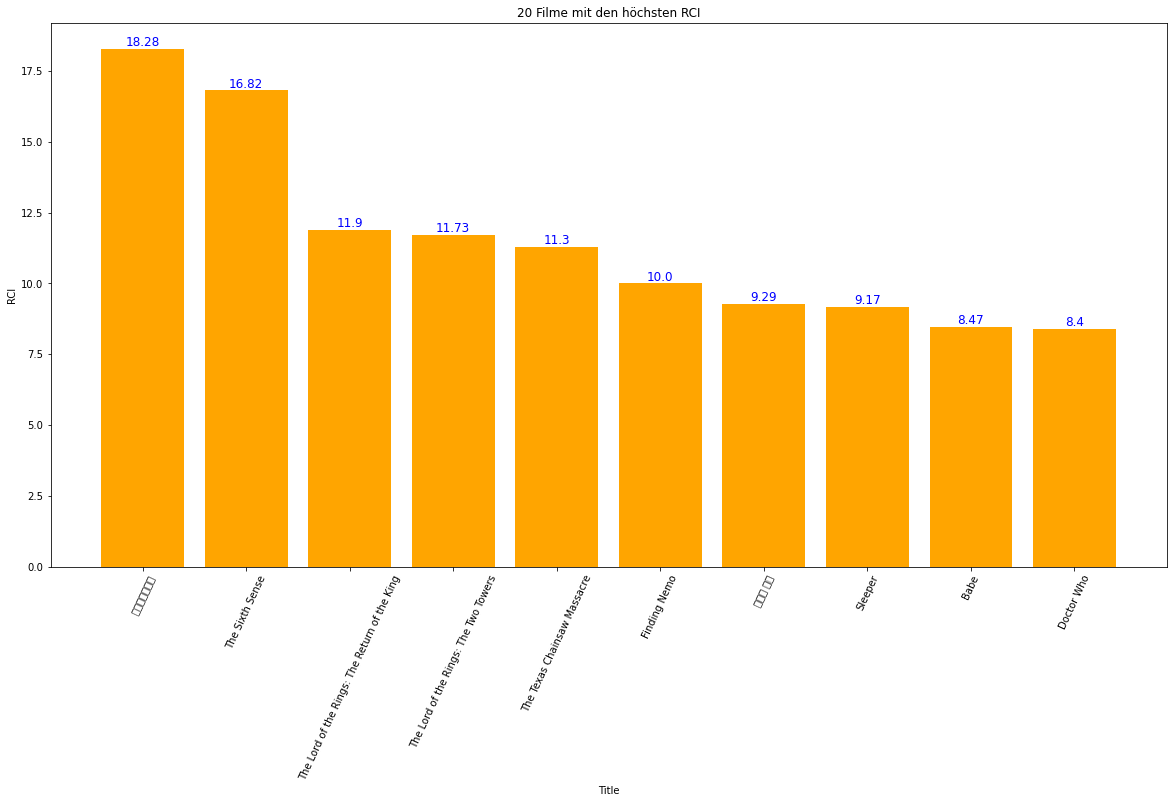

In [55]:
plt.figure(figsize=(20, 10))
plt.bar(x=title, height=rci, color='orange')
plt.xticks(rotation=65)
plt.title("20 Filme mit den höchsten RCI")
plt.ylabel("RCI")
plt.xlabel("Title")
for i, val in enumerate(rci):
    plt.text(i, val, float(round(val, 2)), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12, 'color':'Blue'})

plt.show()

In [ ]:
# repräsentiert Die RCI der ersten 10 Filme

# Box plot

In [56]:
revenue = dataframe.revenue
budgets = dataframe.budgets

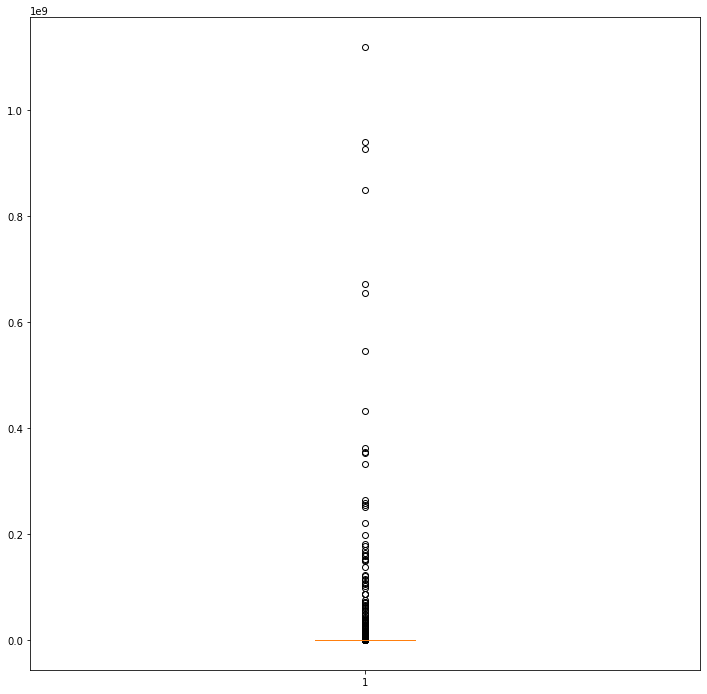

In [57]:
plt.figure(figsize=(12, 12))
plt.boxplot(dataframe['revenue'])
plt.show()

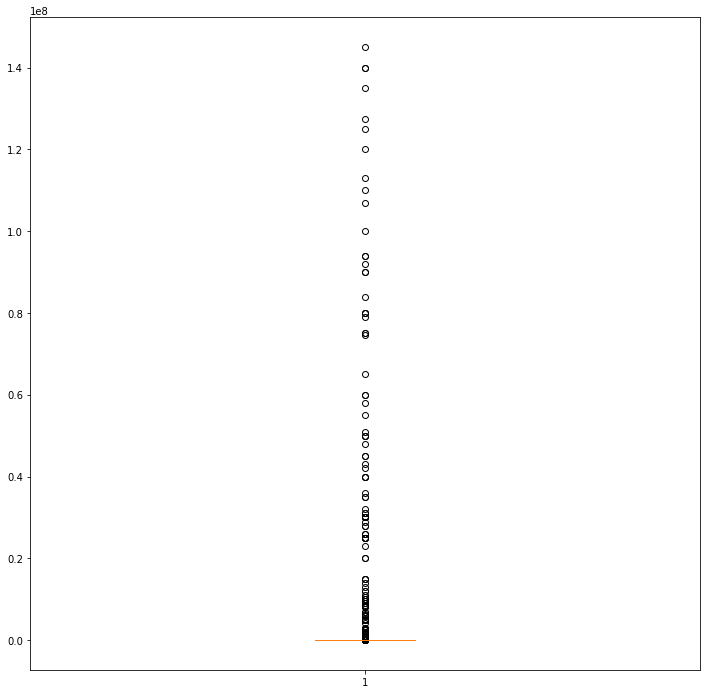

In [58]:
plt.figure(figsize=(12, 12))
plt.boxplot(dataframe['budgets'])
plt.show()

# Matrix-Korrelation

In [59]:
corr_df = dataframe.corr(method='pearson')

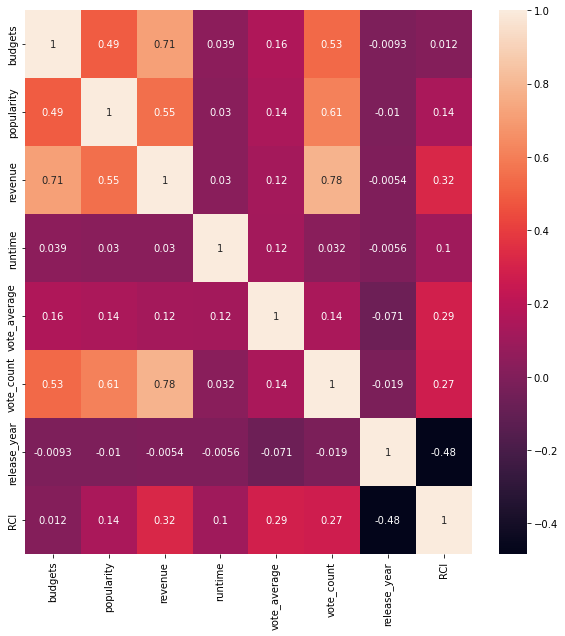

In [60]:
plt.figure(figsize=(10, 10))
sns.heatmap(corr_df, annot=True)
plt.show()

In [ ]:
#Die stärkste Korrelation in zwischen Budget und Einkommen (0.76)

Welche Film wird am häufigsten Stimmenauszählung bekommen (1 Frage)

In [99]:
dataframe.vote_count.value_counts()

0        1726
1         350
2         163
3          80
4          70
         ... 
242         1
668         1
80          1
110         1
11364       1
Name: vote_count, Length: 219, dtype: int64

In [100]:
vote_count

[11,
 5,
 3,
 4,
 0,
 0,
 6,
 0,
 3,
 1,
 0,
 1,
 1,
 11,
 0,
 0,
 0,
 18,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 4,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 10,
 1,
 0,
 209,
 2,
 13,
 4,
 2,
 3460,
 4,
 1,
 0,
 0,
 3,
 1,
 13,
 2522,
 0,
 535,
 3101,
 2267,
 12,
 4,
 38,
 0,
 26,
 0,
 127,
 524,
 524,
 41,
 0,
 7,
 0,
 11,
 50,
 21327,
 2383,
 15,
 164,
 7,
 12,
 1,
 2,
 0,
 4,
 5,
 0,
 4,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 8,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 0,
 0,
 3,
 1,
 45,
 2,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0

In [102]:
vote_count = []
for g in dataframe.vote_count.value_counts().iteritems():
    h = [g[0], g[1]]
    vote_count.append(h)

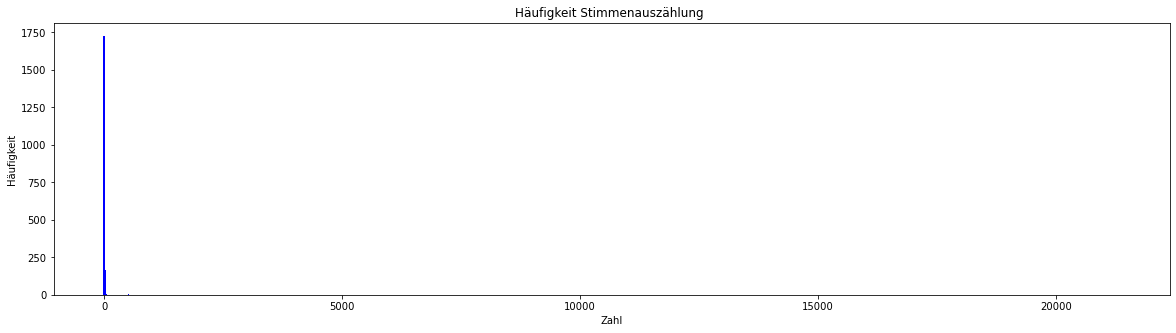

In [104]:
plt.figure(figsize=(20, 5))
plt.bar([x[0] for x in vote_count ], [x[1] for x in vote_count], width=0.5, color='Black', edgecolor='Blue', linewidth=2)
plt.title("Häufigkeit Stimmenauszählung ")
plt.ylabel("Häufigkeit")
plt.xlabel("Zahl")
plt.show()

In welchem Jahr wurden die meisten Filme veröffentlicht (2 Frage)

In [61]:
dataframe.release_year.value_counts()

2005.0    307
2004.0    260
2003.0    222
2000.0    199
2002.0    177
         ... 
1910.0      1
1927.0      1
1931.0      1
1950.0      1
1953.0      1
Name: release_year, Length: 82, dtype: int64

In [62]:
release_year

['1995',
 '1995',
 '2011',
 '1995',
 '1995',
 '1995',
 '2012',
 '1995',
 '1995',
 '1995',
 '1995',
 '2020',
 '1995',
 '2011',
 '1975',
 '1995',
 '1995',
 '2004',
 '2005',
 '1995',
 '2019',
 nan,
 '2006',
 '1995',
 nan,
 '1995',
 nan,
 nan,
 nan,
 '2008',
 '1995',
 '2017',
 '1995',
 nan,
 nan,
 nan,
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1998',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '2007',
 '1995',
 '2005',
 '1995',
 '2010',
 '1995',
 '2005',
 '1996',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1996',
 '1994',
 '1995',
 '1994',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 nan,
 '1995',
 '1995',
 '2016',
 '1995',
 '1995',
 nan,
 '1995',
 '1995',
 '2009',
 '1996',
 '1995',
 '2005',
 '1996',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '2012',
 '2015',
 '2008',
 '2020',
 '2012',
 '2022',
 '2001',
 nan,
 '1995',
 '1995',
 '1995',
 '1996',
 nan,
 '2004',
 '1995',
 

In [63]:
release_year = []
for g in dataframe.release_year.value_counts().iteritems():
    h = [g[0], g[1]]
    release_year.append(h)

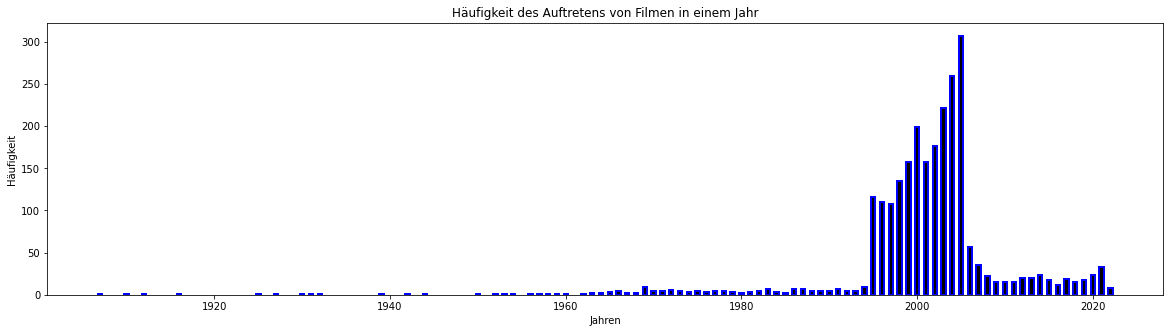

In [66]:
plt.figure(figsize=(20, 5))
plt.bar([x[0] for x in release_year], [x[1] for x in release_year], width=0.5, color='Black', edgecolor='Blue', linewidth=2)
plt.title("Häufigkeit des Auftretens von Filmen in einem Jahr")
plt.ylabel("Häufigkeit")
plt.xlabel("Jahren")
plt.show()

Welche Company hat die meisten Filme veröffentlicht (Frage 3)

In [84]:
dataframe.production_companies.value_counts()


World Wrestling Entertainment (WWE)     114
World Championship Wrestling (WCW)       63
Extreme Championship Wrestling (ECW)     38
Total Nonstop Action (TNA)               12
Les Restaurants du Coeur                 11
                                       ... 
Fox Sports Films                          1
Jacqueline Kay                            1
First Look International                  1
MacGillivray Freeman Films                1
A&E Television Networks                   1
Name: production_companies, Length: 708, dtype: int64

In [85]:
production_companies

['World Wrestling Entertainment (WWE)',
 'World Wrestling Entertainment (WWE)',
 nan,
 'World Wrestling Entertainment (WWE)',
 nan,
 'World Championship Wrestling (WCW)',
 nan,
 'World Championship Wrestling (WCW)',
 'World Wrestling Entertainment (WWE)',
 'World Championship Wrestling (WCW)',
 'Extreme Championship Wrestling (ECW)',
 nan,
 'Extreme Championship Wrestling (ECW)',
 'Free Mind Films',
 'Sveriges Radio (SR)',
 nan,
 'Extreme Championship Wrestling (ECW)',
 nan,
 nan,
 'World Championship Wrestling (WCW)',
 'MLB Network',
 nan,
 nan,
 nan,
 nan,
 'World Championship Wrestling (WCW)',
 nan,
 nan,
 nan,
 'Kolorton D.O.O.',
 'Extreme Championship Wrestling (ECW)',
 nan,
 'World Championship Wrestling (WCW)',
 nan,
 nan,
 nan,
 nan,
 'World Championship Wrestling (WCW)',
 nan,
 'Suede HQ',
 'Extreme Championship Wrestling (ECW)',
 nan,
 'Absolut Live',
 'World Championship Wrestling (WCW)',
 nan,
 nan,
 nan,
 nan,
 'Antenne 2',
 nan,
 'MTV Concerts',
 "All Japan Women's Pro-Wr

Daten extraktion mit einer ähnlichen ID

In [ ]:
#Antwort Frage der Korrelation: Die grosste Korrelation besteht zwischen Buget und Revenue (0.76),und die schwächste zwische Release Year und ROI: 
Je höher das Budget, desto höher die Einnahmen bzw. die Konsumation